# Принятие решения на основе данных. Проведение А/В теста и анализ его результата

Вы — аналитик крупного интернет-магазина. Вместе с отделом маркетинга вы подготовили список гипотез для увеличения выручки.


# Задачи проекта

- Загрузить данные и изучить общую информацию по ним
- Приоритизировать гипотезы 
- Провести A/B-тест и проанализировать результаты.
- Сделать выводы по тесту

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#1.-Изучение-общей-информации" data-toc-modified-id="1.-Изучение-общей-информации-1">1. Изучение общей информации</a></span></li><li><span><a href="#1.1-Вывод" data-toc-modified-id="1.1-Вывод-2">1.1 Вывод</a></span></li><li><span><a href="#2.-Приоритизация-гипотез" data-toc-modified-id="2.-Приоритизация-гипотез-3">2. Приоритизация гипотез</a></span></li><li><span><a href="#2.1-Вывод" data-toc-modified-id="2.1-Вывод-4">2.1 Вывод</a></span></li><li><span><a href="#3.-Анализ-A/B-теста" data-toc-modified-id="3.-Анализ-A/B-теста-5">3. Анализ A/B-теста</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Кумулятивная-выручка-по-группам" data-toc-modified-id="Кумулятивная-выручка-по-группам-5.0.1">Кумулятивная выручка по группам</a></span></li><li><span><a href="#Кумулятивный-средний-чек-по-группам" data-toc-modified-id="Кумулятивный-средний-чек-по-группам-5.0.2">Кумулятивный средний чек по группам</a></span></li><li><span><a href="#Относительное-изменение-кумулятивного-среднего-чека-группы-B-к-группе-A" data-toc-modified-id="Относительное-изменение-кумулятивного-среднего-чека-группы-B-к-группе-A-5.0.3">Относительное изменение кумулятивного среднего чека группы B к группе A</a></span></li><li><span><a href="#Кумулятивная-конверсия-по-группам" data-toc-modified-id="Кумулятивная-конверсия-по-группам-5.0.4">Кумулятивная конверсия по группам</a></span></li><li><span><a href="#Относительное-изменение-кумулятивной-конверсии-группы-B-к-группе-A" data-toc-modified-id="Относительное-изменение-кумулятивной-конверсии-группы-B-к-группе-A-5.0.5">Относительное изменение кумулятивной конверсии группы B к группе A</a></span></li><li><span><a href="#Распределение-количества-заказов-по-пользователям" data-toc-modified-id="Распределение-количества-заказов-по-пользователям-5.0.6">Распределение количества заказов по пользователям</a></span></li><li><span><a href="#Граница-для-определения-аномальных-пользователей" data-toc-modified-id="Граница-для-определения-аномальных-пользователей-5.0.7">Граница для определения аномальных пользователей</a></span></li><li><span><a href="#Распределение-стоимостей-заказов" data-toc-modified-id="Распределение-стоимостей-заказов-5.0.8">Распределение стоимостей заказов</a></span></li><li><span><a href="#Граница-для-определения-аномальных-заказов-по-стоимости" data-toc-modified-id="Граница-для-определения-аномальных-заказов-по-стоимости-5.0.9">Граница для определения аномальных заказов по стоимости</a></span></li><li><span><a href="#Cтатистическая-значимость-различий-в-показателях-по-&quot;сырым&quot;-данным" data-toc-modified-id="Cтатистическая-значимость-различий-в-показателях-по-&quot;сырым&quot;-данным-5.0.10">Cтатистическая значимость различий в показателях по "сырым" данным</a></span></li><li><span><a href="#Cтатистическая-значимость-различий-в-среднем-чеке-заказа-по-&quot;сырым&quot;-данным" data-toc-modified-id="Cтатистическая-значимость-различий-в-среднем-чеке-заказа-по-&quot;сырым&quot;-данным-5.0.11">Cтатистическая значимость различий в среднем чеке заказа по "сырым" данным</a></span></li><li><span><a href="#Cтатистическая-значимость-различий-в-конверсии-по-&quot;очищенным&quot;-данным" data-toc-modified-id="Cтатистическая-значимость-различий-в-конверсии-по-&quot;очищенным&quot;-данным-5.0.12">Cтатистическая значимость различий в конверсии по "очищенным" данным</a></span></li><li><span><a href="#Cтатистическая-значимость-различий-в-среднем-чеке-заказа-по-&quot;очищенным&quot;-данным" data-toc-modified-id="Cтатистическая-значимость-различий-в-среднем-чеке-заказа-по-&quot;очищенным&quot;-данным-5.0.13">Cтатистическая значимость различий в среднем чеке заказа по "очищенным" данным</a></span></li></ul></li></ul></li><li><span><a href="#3.1-Вывод" data-toc-modified-id="3.1-Вывод-6">3.1 Вывод</a></span></li><li><span><a href="#4.-Общий-вывод" data-toc-modified-id="4.-Общий-вывод-7">4. Общий вывод</a></span></li></ul></div>

## 1. Изучение общей информации 

Выгрузим все необходимые нам библиотеки, и загрузим исходные файлы

In [1]:
# Загрузим все необходимые нам библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display
from scipy import stats as st
import math as mth

Загрузим первый файл в переменную `hypothesis`

In [2]:
hypothesis = pd.read_csv('/datasets/hypothesis.csv')
# Настроим вывод таблицы так, чтобы текст в ячейке отражался полностью вне зависимости от длины
# и все числа отражались с двумя знаками после запятой
pd.set_option('display.max_colwidth', -1)
pd.set_option('display.float_format', '{:.2f}'.format)
# Посмотрим на содержание таблицы
display(hypothesis.head(10), hypothesis.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
Hypothesis    9 non-null object
Reach         9 non-null int64
Impact        9 non-null int64
Confidence    9 non-null int64
Efforts       9 non-null int64
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


None

Данная таблица содержит 5 столбцов:

- `Hypothesis` — краткое описание гипотезы;
- `Reach` — охват пользователей по 10-балльной шкале;
- `Impact` — влияние на пользователей по 10-балльной шкале;
- `Confidence` — уверенность в гипотезе по 10-балльной шкале;
- `Efforts` — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение **Efforts**, тем дороже проверка гипотезы.

Данные в таблице полные, пропуски отсутсвуют, типы данных для каждого столбца указаны верно. Для удобства переведем все названия столбцов в нижний регистр.

In [3]:
hypothesis.columns = hypothesis.columns.str.lower()
hypothesis.columns

Index(['hypothesis', 'reach', 'impact', 'confidence', 'efforts'], dtype='object')

Загрузим второй файл в переменную `orders`

In [4]:
orders = pd.read_csv('/datasets/orders.csv')
#Посмотрим на содержание таблицы
display(orders.head(10), orders.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
transactionId    1197 non-null int64
visitorId        1197 non-null int64
date             1197 non-null object
revenue          1197 non-null int64
group            1197 non-null object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
5,182168103,935554773,2019-08-15,2210,B
6,398296753,2900797465,2019-08-15,1860,B
7,2626614568,78758296,2019-08-15,1044,A
8,1576988021,295230930,2019-08-15,13710,A
9,1506739906,1882260405,2019-08-15,1855,B


None

Данная таблица содержит 5 столбцов:

- `transactionId` — идентификатор заказа;
- `visitorId` — идентификатор пользователя, совершившего заказ;
- `date` — дата, когда был совершён заказ;
- `revenue` — выручка заказа;
- `group` — группа A/B-теста, в которую попал заказ.

Данные в таблицы полные, пропусков нет. Тип данных для столбца `date` - *object*, хотя в нем указана дата совершения заказа, приведем данные этого столбца к правильному типу **datetime** 

In [5]:
orders['date'] = pd.to_datetime(orders['date'], format='%Y-%m-%d')
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
transactionId    1197 non-null int64
visitorId        1197 non-null int64
date             1197 non-null datetime64[ns]
revenue          1197 non-null int64
group            1197 non-null object
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


In [6]:
#Посмотрим на распеределение дат
orders['date'].sort_values().unique()

array(['2019-08-01T00:00:00.000000000', '2019-08-02T00:00:00.000000000',
       '2019-08-03T00:00:00.000000000', '2019-08-04T00:00:00.000000000',
       '2019-08-05T00:00:00.000000000', '2019-08-06T00:00:00.000000000',
       '2019-08-07T00:00:00.000000000', '2019-08-08T00:00:00.000000000',
       '2019-08-09T00:00:00.000000000', '2019-08-10T00:00:00.000000000',
       '2019-08-11T00:00:00.000000000', '2019-08-12T00:00:00.000000000',
       '2019-08-13T00:00:00.000000000', '2019-08-14T00:00:00.000000000',
       '2019-08-15T00:00:00.000000000', '2019-08-16T00:00:00.000000000',
       '2019-08-17T00:00:00.000000000', '2019-08-18T00:00:00.000000000',
       '2019-08-19T00:00:00.000000000', '2019-08-20T00:00:00.000000000',
       '2019-08-21T00:00:00.000000000', '2019-08-22T00:00:00.000000000',
       '2019-08-23T00:00:00.000000000', '2019-08-24T00:00:00.000000000',
       '2019-08-25T00:00:00.000000000', '2019-08-26T00:00:00.000000000',
       '2019-08-27T00:00:00.000000000', '2019-08-28

В таблице представлены данные с 1 по 31 августа 2019 года

In [7]:
#Посмотрим сколько групп участвовало в тесте
orders['group'].sort_values().unique()

array(['A', 'B'], dtype=object)

В тесте участвовало две гурпы **А** и **В**

In [8]:
#Посмотрим на распределение выручки
orders['revenue'].describe()

count   1197.00   
mean    8348.01   
std     39191.13  
min     50.00     
25%     1220.00   
50%     2978.00   
75%     8290.00   
max     1294500.00
Name: revenue, dtype: float64

Показатели выручки имеют большой разброс от 50 до 1 294 500 у.е.. Среднее значение равно 8 348 у.е., а медианное 2 978 у.е.

Загрузим третий файл в переменную `visitors`

In [9]:
visitors = pd.read_csv('/datasets/visitors.csv')
#Посмотрим на содержание таблицы
display(visitors.head(10), visitors.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
date        62 non-null object
group       62 non-null object
visitors    62 non-null int64
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
5,2019-08-06,A,667
6,2019-08-07,A,644
7,2019-08-08,A,610
8,2019-08-09,A,617
9,2019-08-10,A,406


None

Таблица содержит 3 столбца:

- `date` — дата;
- `group` — группа A/B-теста;
- `visitors` — количество пользователей в указанную дату в указанной группе A/B-теста

Данные в таблице полные, пропуски отсутсвуют.  Тип данных для столбца `date` - *object*, хотя в нем указана дата, приведем данные этого столбца к правильному типу **datetime**

In [10]:
visitors['date'] = pd.to_datetime(visitors['date'], format='%Y-%m-%d')
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
date        62 non-null datetime64[ns]
group       62 non-null object
visitors    62 non-null int64
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


Как и прошлом файле посмотрим на распределение дат и количество групп

In [11]:
#Посмотрим на распеределение дат
visitors['date'].sort_values().unique()

array(['2019-08-01T00:00:00.000000000', '2019-08-02T00:00:00.000000000',
       '2019-08-03T00:00:00.000000000', '2019-08-04T00:00:00.000000000',
       '2019-08-05T00:00:00.000000000', '2019-08-06T00:00:00.000000000',
       '2019-08-07T00:00:00.000000000', '2019-08-08T00:00:00.000000000',
       '2019-08-09T00:00:00.000000000', '2019-08-10T00:00:00.000000000',
       '2019-08-11T00:00:00.000000000', '2019-08-12T00:00:00.000000000',
       '2019-08-13T00:00:00.000000000', '2019-08-14T00:00:00.000000000',
       '2019-08-15T00:00:00.000000000', '2019-08-16T00:00:00.000000000',
       '2019-08-17T00:00:00.000000000', '2019-08-18T00:00:00.000000000',
       '2019-08-19T00:00:00.000000000', '2019-08-20T00:00:00.000000000',
       '2019-08-21T00:00:00.000000000', '2019-08-22T00:00:00.000000000',
       '2019-08-23T00:00:00.000000000', '2019-08-24T00:00:00.000000000',
       '2019-08-25T00:00:00.000000000', '2019-08-26T00:00:00.000000000',
       '2019-08-27T00:00:00.000000000', '2019-08-28

В таблице представлены данные с 1 по 31 августа 2019 года

In [12]:
#Посмотрим сколько групп участвовало в тесте
visitors['group'].sort_values().unique()

array(['A', 'B'], dtype=object)

В таблице представленые данные двух групп **А** и **В**

In [13]:
#Проверим все таблц=ицы на наличие дубликатов
display(hypothesis.duplicated().sum(), orders.duplicated().sum(), visitors.duplicated().sum())

0

0

0

Дубликаты во всех таблицах отсутствуют

## 1.1 Вывод

Для проведения А/В тестирования у нас есть три таблицы: 

- `hypothesis` содержит данные о гипотезах и различные показатели для определения наиболее продуктивной гипотезы;
- `orders` содержит данные о заказах, а именно, когда был совершен заказ, на какую сумму, каким пользователем, к какой группе данный пользователь принадлежит и индефикатор заказа; 
- `visitors` содержит данные о количестве пользователей каждой группы, которые заходили на ресурс в определенную дату.

Данные во всех таблицах полные, пропуски отсутсвуют. Так же в таблицах `orders` и `visitors`, для столбцов с датами были указаны не правильные типы данных, произвели заменну даных стобцов на корректные.

Всего в таблице `hypothesis` содержится 9 гипотез по увеличению выручки:

- Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей
- Запустить собственную службу доставки, что сократит срок доставки заказов
- Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа
- Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар	
- Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей
- Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов
- Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию	
- Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок
- Запустить акцию, дающую скидку на товар в день рождения

Данные о выручке в таблице `orders` имеют большой разброс от 50 до 1 294 500 у.е. с средним значением 8 348 у.е. и медианным 2 978 у.е.. Предполагаю что это может быть связанно с большой вариативностью товара и ценой на него, те в интернет магазине продаются как например зубачистки, тк и например стулья элитной категории.

Вертнуться к [**Содержанию**](#Содержание)

## 2. Приоритизация гипотез

In [14]:
#Расчитаем для каждой гипотезы показатель ICE
hypothesis['ICE'] = (hypothesis['impact'] * hypothesis['confidence'])\
    / hypothesis['efforts']
#Выведем гипотезы на экран по убыванию показателя ICE
hypothesis[['hypothesis', 'ICE']].sort_values(by='ICE', ascending=False)\
.reset_index(drop=True)

,hypothesis,ICE
0,"Запустить акцию, дающую скидку на товар в день рождения",16.20
1,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33
2,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20
3,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.00
4,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.00
5,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.00
6,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33
7,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12
8,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00


Самыми приоритетными гипотезами для проверки являются:

- **Запустить акцию, дающую скидку на товар в день рождения** - показатель `ICE = 16.20`
- **Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей** - показатель `ICE = 13.33`
- **Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок** - показатель `ICE = 11.20` 

In [15]:
#Расчитаем для каждой гипотезы показатель RICE
hypothesis['RICE'] = (hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence'])\
    / hypothesis['efforts']
#Выведем гипотезы на экран по убыванию показателя RICE 
hypothesis[['hypothesis', 'RICE']].sort_values(by='RICE', ascending=False)\
.reset_index(drop=True)

,hypothesis,RICE
0,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.00
1,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.00
2,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.00
3,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.00
4,"Запустить акцию, дающую скидку на товар в день рождения",16.20
5,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.00
6,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.00
7,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.00
8,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.00


Самыми приоритетными гипотезами для проверки являются:

- **Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок** - показатель `RICE = 112`
- **Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа** - показатель `RICE = 56`
- **Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей** - показатель `RICE = 40`
- **Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию** - показатель `RICE = 40`

Посмотрим на различия в приоритизации фреймворками ICE и RICE

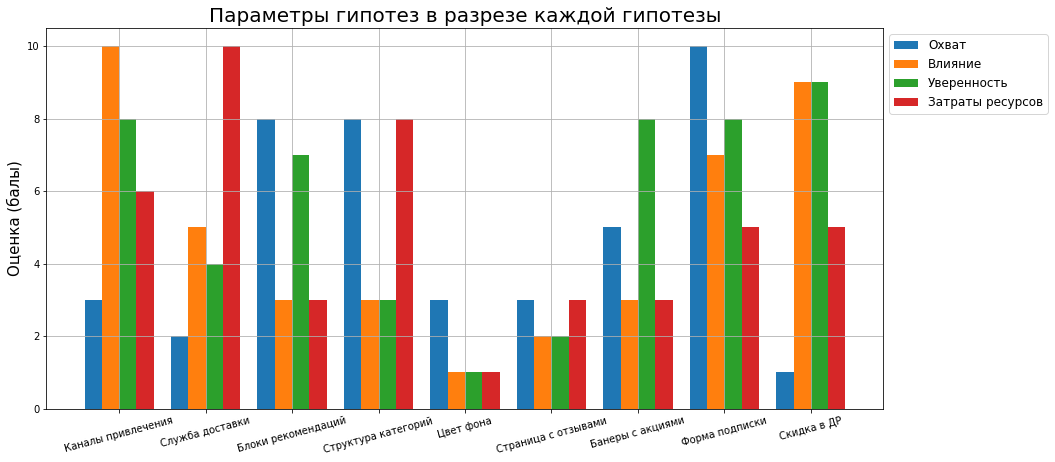

In [16]:
#Отрисуем график
fig, ax = plt.subplots(figsize=(15,7))
ax.set_title('Параметры гипотез в разрезе каждой гипотезы',fontsize=20)
ax.set_ylabel('Оценка (балы)',fontsize=15)
x1 = np.arange(0,9) - 0.3
x2 = np.arange(0,9) - 0.1
x3 = np.arange(0,9) + 0.1
x4 = np.arange(0,9) + 0.3
plt.xticks([0, 1, 2, 3, 4, 5, 6, 7, 8], 
           ['Каналы привлечения',
            'Служба доставки',
            'Блоки рекомендаций',
            'Структура категорий',
            'Цвет фона',
            'Страница с отзывами', 
            'Банеры с акциями',
            'Форма подписки',
            'Скидка в ДР'], 
           rotation=15)
ax.bar(x1, hypothesis['reach'], width=0.2, label='Охват')
ax.bar(x2, hypothesis['impact'], width=0.2, label='Влияние')
ax.bar(x3, hypothesis['confidence'], width=0.2, label='Уверенность')
ax.bar(x4, hypothesis['efforts'], width=0.2, label='Затраты ресурсов')
ax.grid()
ax.legend(bbox_to_anchor=(1, 1), fontsize=12);


Самой приоритетной гипотезой по фреймворку ICE была, гипотеза о запуске акции, которая дает скидку на товр в день рождения. Однако в фрейморке RICE данная гипотеза идет только на пятом месте, это произошло, потому что данная гипотеза имеет самый низки показатель охвата пользователей.

Самой приоритетной гипотезой по фреймворку RICE была, гипотеза о добавлении форм подписки. Однако в фреймворке ICE данная гипотеза была на третьем месте, но из за влияния показателя охвата, данная гипотеза в фреймворке RICE поднимается на первое место.

Средний показатель охвата в гипотезе о новых канал привлечения, переместил данную гипотезу на третье место в фремворке RICE, когда в фреймворке ICE данная гипотезазначилась на втром месте.

Высокие показатели охвата в гипотезах о добавлении блоков рекомендаций и изменении структуры категорий, вывели данные гипотеза на второе и четвертое место в фрейморке RICE, по сравнению с фремворком ICE, где данные гипотезы занимали только четвертое и седьмое места соотвественно. 

Все остальные гипотезы обладают меньшей приоритетность по обоим фреймворкам, потому что их показатели охвата оказались невысокими, и это не сильно изменило результаты приоритизации в фремворке RICE по сравнению с фреймворком ICE.


## 2.1 Вывод

Наиболее перспективными гипотезами по фреймворку ICE (включает в себя факторы влияния, уверенности и затрат ресурсов) оказались :

- **Запустить акцию, дающую скидку на товар в день рождения**
- **Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей**
- **Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок**

Однако, ввиду большого влияния показателя охвата пользователей, который используется в фремворке RICE, некоторые гипотезы переместелись на более высокие места, а другие наоборот опустиились почти в самый низ таблицы. Так например гипотеза о запуске акции, которая дает скидку на товр в день рождения, имеет самый низкий показатель охвата, что привело к ее падению с первого места на пятое, а гипотеза о добавлении форм подписки наоборот поднилась с третьего на первое место. Так же необходимо отметить что гипотезы о добавлении блоков рекомендаций и изменении структуры категорий поднялись с четвертого и седьмого места на второе и четвертое соотвественно, а гипотеза о новых канал привлечения опустилась со вторго на третье место.

С учетом вышеизложеного наиболее перспективынми гипотезами являются:

- **Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок**
- **Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа**
- **Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей**
- **Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию**

Вертнуться к [**Содержанию**](#Содержание)

## 3. Анализ A/B-теста

Прежде чем переходить к анализу А/В теста, проверим не попали ли однни и теже пользователи в обе группы

In [17]:
both_groups = orders.pivot_table(index='visitorId',\
                                columns='group',\
                                values='revenue',\
                                aggfunc='count')\
                                .reset_index()\
                                .query('A == 1 & B == 1')
              
len(both_groups['visitorId'].unique())\
    / len(orders['visitorId'].unique()) * 100

3.394762366634336

3,4 % пользователей попали в обе группы, конечно это не очень хорошо, тк может исказаить результаты А/В теста, но сделать мы сделать с этим мы ничего не сможем, тк мы не знаем даты когда это могло случиться, а не зная дат мы удалив этих пользователей и данной таблицы не смодем корректно удалить их из  таблицы `visitors`. На основании выше сказанно оставляем все как есть, но при анализе будем это учитытвать и можно немного утешить себя тк таких пользователей всего 3,4 % что позволяет нам думать что сильно на результаты это не повлияет.

#### Кумулятивная выручка по группам 

In [18]:
# Cоздаем массив уникальных пар значений дат и групп теста
datesGroups = orders[['date','group']].drop_duplicates() 

# Получаем агрегированные кумулятивные по дням данные о заказах 
ordersAggregated =  datesGroups.apply\
    (lambda x: orders[np.logical_and(orders['date'] <= x['date'],
    orders['group'] == x['group'])]\
    .agg({'date': 'max', 'group': 'max', 'transactionId': pd.Series.nunique,
    'visitorId': pd.Series.nunique, 'revenue': 'sum'}), axis=1)\
    .sort_values(by=['date','group'])
    
# Получаем агрегированные кумулятивные по дням данные о посетителях интернет-магазина  
visitorsAggregated = datesGroups.apply\
    (lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], 
    visitors['group'] == x['group'])]\
    .agg({'date': 'max', 'group': 'max', 'visitors': 'sum'}), axis=1)\
    .sort_values(by=['date','group'])
    
        

# Объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cumulativeData = ordersAggregated.merge(
    visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group']
    )
cumulativeData.columns = (
    ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']
    )

Собрали кумулятивные данные в одной таблице `cumulativeData`. Теперь посчитаем кумулятивную выручку для каждой группы в разрезе дней и визуализируем это на графике.

/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


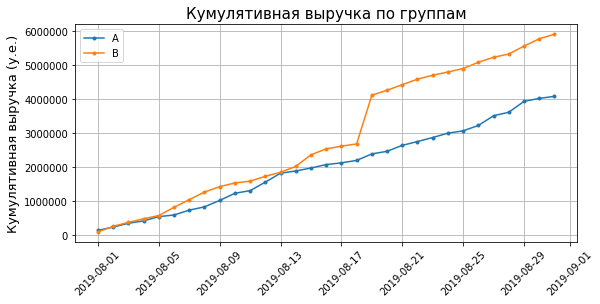

In [19]:
# Датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A']\
    [['date','revenue', 'orders']]

# Датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B']\
    [['date','revenue', 'orders']]

# Функция для построения графика двух показателей
def plot_2 (dataA, dataB, column, title, ylabel):
    ax.set_title(title, fontsize=15)
    ax.set_ylabel(ylabel, fontsize=13)
    ax.plot(dataA['date'], dataA[column], '.-', label='A')
    ax.plot(dataB['date'], dataB[column], '.-', label='B')
    plt.xticks(rotation=45)
    ax.grid()
    ax.legend();
    
# Построим график кумулятивной выручки по группам
fig, ax = plt.subplots(figsize=(9,4))
plot_2(cumulativeRevenueA,
     cumulativeRevenueB,
     'revenue',
     'Кумулятивная выручка по группам',
     'Кумулятивная выручка (у.е.)')
plt.show()

Выручка для обеих групп увеличивалась в течении всего теста. С 1 августа по 5 августа в обоих группах значение выручки примерно совпадало, далее с 5 августа и по 13 августа выручка начала различаться, причем группа В показывает бОльший результат. 13 августа выручки были почти одинаковые, а после этой даты выручки больше не совпадали и выручка группы В была выше чем у выручки А. Так же необходимо отметить большое возрастание выручки с 18 на 19 августа у группы В, предполагаю что в эту дату произошла какая то крупная покупка.

#### Кумулятивный средний чек по группам

In [20]:
# Посчитаем кумулятивный средний чек для каждой группы
cumulativeRevenueA['average_check'] = cumulativeRevenueA['revenue'] / cumulativeRevenueA['orders']
cumulativeRevenueB['average_check'] = cumulativeRevenueB['revenue'] / cumulativeRevenueB['orders']

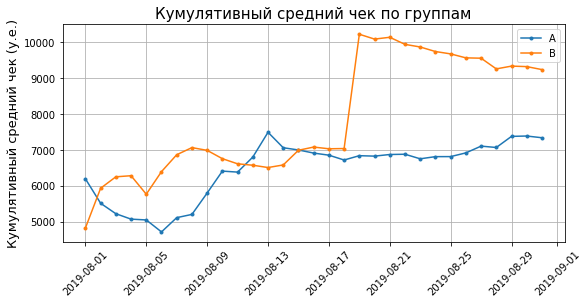

In [21]:
# Построим график кумулятивных средних чеков для каждой группы
fig, ax = plt.subplots(figsize=(9,4))
plot_2(cumulativeRevenueA,
     cumulativeRevenueB,
     'average_check',
     'Кумулятивный средний чек по группам',
     'Кумулятивный средний чек (у.е.)')

В группе А с начала и примерно до середины теста были и взлеты и падения среденего чека, псоле середины августа ситуация выравнилась и средний чек почти что стал равномерным с небольшими колебаниями в районе 7 000 у.е.

В группе В с начала и до 18 августа имеет как взлеты так и небольшие падения среднего чека, далее с 18 по 19 августа происходит резский скачок значения среднего чека с 7 000 у.е. до 10 000 у.е., предполагаю что данный скачок связан с крупными покупка произошедшими в этот день.

#### Относительное изменение кумулятивного среднего чека группы B к группе A 

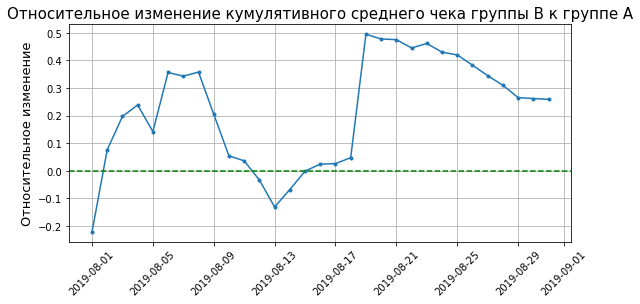

In [22]:
# Объеденим таблицы с кумулятивными средними чеками по группе в одну
mergedCumulativeRevenue = pd.merge(
    cumulativeRevenueA,
    cumulativeRevenueB,
    left_on='date',
    right_on='date',
    how='left',
    suffixes=['A', 'B'])

# Расчетаем отношения кумулятивных средних чеков 
mergedCumulativeRevenue['average_checkAB'] =\
    (mergedCumulativeRevenue['average_checkB']\
    / mergedCumulativeRevenue['average_checkA']) - 1

# Функция для построения графика одного показателя
def plot_1(data, column, title, ylabel):
    ax.set_title(title, fontsize=15)
    ax.set_ylabel(ylabel, fontsize=13)
    ax.plot(data['date'], data[column], '.-')
    ax.axhline(y=0, color='green', linestyle='--')
    plt.xticks(rotation=45)
    ax.grid()
    
# Построим график отношения кумулятивных средних чеков
fig, ax = plt.subplots(figsize=(9,4))
plot_1(mergedCumulativeRevenue,
     'average_checkAB',
     'Относительное изменение кумулятивного среднего чека группы B к группе A',
     'Относительное изменение')

На протяжении всего графика отношение кумулятивных средних чеков резко "скачет", самый сильный скачеок произошел с 18 по 19 августа. Скорее всего в данный день произошли продажи очень дорогих товаров, что говорит нам о наличии выбросов.

#### Кумулятивная конверсия по группам

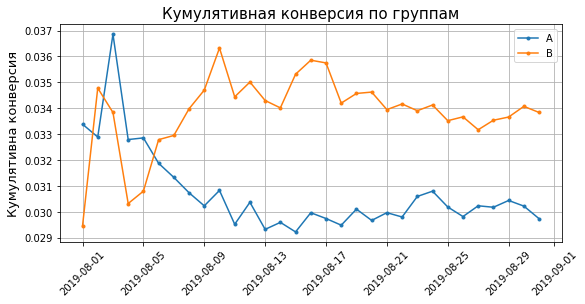

In [23]:
# Cчитаем кумулятивную конверсию
cumulativeData['conversion'] =\
    cumulativeData['orders'] / cumulativeData['visitors']

# Отделим данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# Отделим данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# Построим график кумулятивной конверсии по группам
fig, ax = plt.subplots(figsize=(9,4))
plot_2(cumulativeDataA,
     cumulativeDataB,
     'conversion',
     'Кумулятивная конверсия по группам',
     'Кумулятивна конверсия')

Без установления масштаба кажется, что конверсия постоянно колеблется. Зададим масштаб осей Передадим ему минимальное и максимальное значения оси x; минимальное и максимальное значения оси y

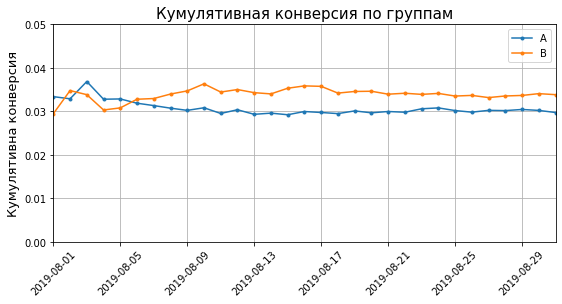

In [24]:
fig, ax = plt.subplots(figsize=(9,4))
plot_2(cumulativeDataA,
     cumulativeDataB,
     'conversion',
     'Кумулятивная конверсия по группам',
     'Кумулятивна конверсия')
ax.axis(
    [pd.to_datetime("2019-08-01"),
     pd.to_datetime('2019-08-31'),
     0,
     0.05]
)
plt.show()

С 1 по 4 августа на графике кумулятивной конверсии по группам видим сильные всплески для обеих групп. Начиная с 6 августа график выглядит почти симетрично, а начиная с 9 августа конверсии обеих групп уставновились на определенном уровне с явным преобладанием кумулятивной конверсии группы В над группой А.

#### Относительное изменение кумулятивной конверсии группы B к группе A

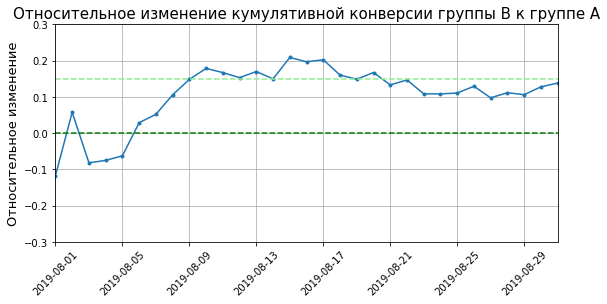

In [25]:
# Объеденим таблицы кумулятивной конверсии по группам в одну
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(
    cumulativeDataB[['date','conversion']],
    left_on='date',
    right_on='date',
    how='left',
    suffixes=['A', 'B'])

# Расчетаем отношения коверсий
mergedCumulativeConversions['conversionAB'] = \
    mergedCumulativeConversions['conversionB'] / mergedCumulativeConversions['conversionA']-1

# Построим график отношения кумулятивных конверсий
fig, ax = plt.subplots(figsize=(9,4))
plot_1(mergedCumulativeConversions,
     'conversionAB',
     'Относительное изменение кумулятивной конверсии группы B к группе A',
     'Относительное изменение')
ax.axhline(y=0.15, color='lightgreen', linestyle='--')
ax.axis(
    [pd.to_datetime("2019-08-01"),
     pd.to_datetime('2019-08-31'),
     -0.3,
     0.3]
)
plt.show()

С 1 августа по 6 августа группа группа А выигрывала у группы В, зи исключение одной даты - 2 августа, где группа В вырвалась вперед на короткий промежуток, но начиная с 6 августа группа В показывала лучший результат и превосходила группу А примерно на 15 %. Можно предположить, что даннй показатель говорит нам о победе группы В над группой А, но чтобы это утверждать точно, нам необходимо проанализировать "выбросы".

#### Распределение количества заказов по пользователям

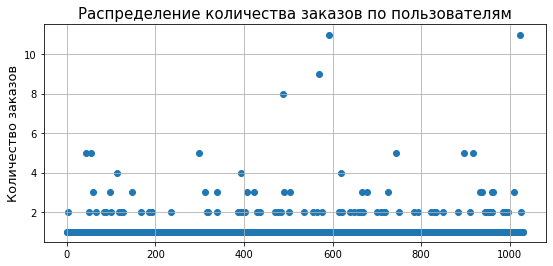

In [26]:
# Посчитаем количество заказов для пользователей
ordersByUsers  = orders.drop(['group', 'revenue', 'date'], axis=1)\
                       .groupby('visitorId', as_index=False)\
                       .agg({'transactionId': pd.Series.nunique})
ordersByUsers .columns = ['visitorId', 'orders']
                     

# Функция для построения графика распределения
def scatter(data, column, title, ylabel):
    ax.set_title(title, fontsize=15)
    ax.set_ylabel(ylabel, fontsize=13)
    x_values = pd.Series(range(0,len(data)))
    ax.scatter(x_values, data[column])
    ax.grid();

# Построим график распределения количества заказов по пользователям
fig, ax = plt.subplots(figsize=(9,4))
scatter(ordersByUsers,
     'orders',
     'Распределение количества заказов по пользователям',
     'Количество заказов')

Из графика мы можем увидеть, что чаще всего заказывали 1 раз. Так же не малая доля принадлежит пользователям с 2-5 заказами, однако точную долю таких пользователей мы пока не знаем, и утверждать что они являются "выбросами" мы пока тоже не можем. На графике мы также видим что есть единичные случаи пользователей, которые сделали 8, 9 и 11 заказов.

#### Граница для определения аномальных пользователей

In [27]:
# Функция для определения 90, 95 и 99 перцентиля
def percentile (data, column):
    display(np.percentile(data[column], [90, 95, 99]))
    
# Определим перцентили для количества заказов    
percentile(ordersByUsers, 'orders')

array([1., 2., 4.])

Не более 5% пользователей оформляли больше чем 2 заказа. И 10% пользователей заказывали более 1 раза. Это значит что граница для определения аномальных пользователей будет пролегать на 2ух закзах, все что выше является "выбросом" и подлежит "очистке".

#### Распределение стоимостей заказов

При анализе выручки,  мы заметили что в некоторых дата происходят всплески увеличения выручки, особенно для группы В. Чтобы разобраться в этом изучим показатель выручки  более подробно.

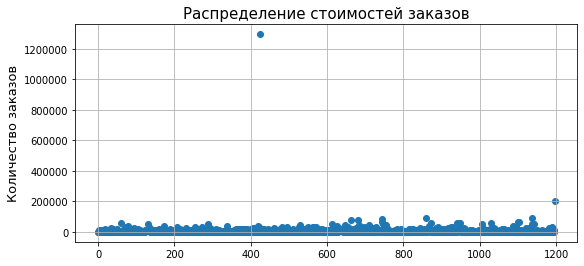

In [28]:
# Построим график распределения стоимостей заказов
fig, ax = plt.subplots(figsize=(9,4))
scatter(orders,
     'revenue',
     'Распределение стоимостей заказов',
     'Количество заказов')

На графике видим всего 2 "выброса" на 1 200 000 у.е. и 200 000 у.е., однако стоимость закзов внизу графика тоже следует изучить получше, для этого масштаируем график, ограничив выручку 200 000 у.е.

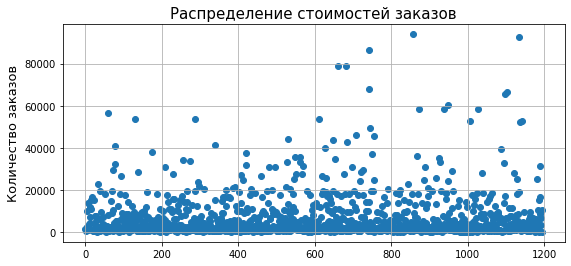

In [29]:
fig, ax = plt.subplots(figsize=(9,4))
scatter(orders[orders['revenue'] <= 200000],
     'revenue',
     'Распределение стоимостей заказов',
     'Количество заказов')

Наибольшая плотность стоимости заказов расположилась ниже 20 000 у.е., чуть мене плотно ниже 40 000 у.е. Однако не будем гадать и предполагать а расчитаем границы по аналогии с количеством заказов

#### Граница для определения аномальных заказов по стоимости 

In [30]:
# Определим перцентили для стоимости заказов   
percentile(orders, 'revenue')

array([18168. , 28000. , 58233.2])

Не более 5 % заказов дороже 28 000 у.е и 10% заказов было совершено на сумму сыше 18168 у.е..Это значит что граница для определения аномальных заказов по стоимости будет пролегать на 28 000 у.е., все что выше является "выбросом" и подлежит "очистке".

#### Cтатистическая значимость различий в показателях по "сырым" данным

In [31]:
# Количество пользователей в выбранную дату в группе A
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

# Количество пользователей до выбранной даты включительно в группе А
visitorsACummulative =visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']]
    .agg({'date': 'max', 'visitorsPerDateA': 'sum'}),
    axis=1)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

# Количество пользователей в выбранную дату в группе В
visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

# Количество пользователей до выбранной даты включительно в группе В
visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']]
    .agg({'date': 'max', 'visitorsPerDateB': 'sum'}),
    axis=1)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

In [32]:
# Количество заказов и суммарная выручка в выбранную дату в группе А
ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

# Суммарное число заказов и суммарная выручка до выбранной даты включительно в группе А
ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']]
    .agg({'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}),
    axis=1).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

# Количество заказов и суммарная выручка в выбранную дату в группе В
ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

# Суммарное число заказов и суммарная выручка до выбранной даты включительно в группе В
ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']]
    .agg({'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}),
    axis=1,).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

In [33]:
# Соединим все таблицы с полученными значениями
data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

In [34]:
# Опредеделим число совершённых заказов для пользователей, которые заказывали хотя бы 1 раз, в каждой группе
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitorId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitorId', 'orders']

Объявим переменные `sampleA` и `sampleB`, в которых пользователям из разных групп будет соответствовать количество заказов и дальше, чтобы получить конверсию в группе, поделим сумму заказов на число пользователей.

In [35]:
sampleA = pd.concat(
    [ordersByUsersA['orders'],
    pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum()
    - len(ordersByUsersA['orders'])),
    name='orders')],axis=0)

sampleB = pd.concat(
    [ordersByUsersB['orders'],
    pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum()
    - len(ordersByUsersB['orders'])),
    name='orders')],axis=0)

Применим критерий Манна-Уитни. Также выведем относительный прирост конверсии группы B: конверсия группы B / конверсия группы A - 1

Сформируем нулевую гипотезу Н0 и альтернативную Н1:

H0 - Статистически значимых различий в конверсии между группами А и В нет;
H1 - Статистически значимые различия в конверсии между группами А и В есть.

In [36]:
display('Значение p-value для конверсий: {:.3f}'.format(st.mannwhitneyu(sampleA, sampleB)[1]))
display('Относительный прирост конверсии группы B: {:.3f}'.format((sampleB.mean()/sampleA.mean()) - 1))

'Значение p-value для конверсий: 0.008'

'Относительный прирост конверсии группы B: 0.138'

Значение p-value меньше 0,05, поэтому нулеую гипотезу, о том что статистически значимых различий в конверсии между группами нет, отвергаем. Однако относительный выйгрыш группы B равен 13,8 %.

Но тк расчеты были выполнены на "сырых" данных, требуется также изучить статистически значимые различия среднего чека в группах и проанализировать "очищенные" данные.

#### Cтатистическая значимость различий в среднем чеке заказа по "сырым" данным

Чтобы рассчитать статистическую значимость различий в среднем чеке между сегментами по "сырым" данным, передадим критерию `mannwhitneyu()` данные о выручке с заказов, а также найдём относительные различия в среднем чеке между группами

Сформируем нулевую гипотезу Н0 и альтернативную Н1:

H0 - Средний чек группы В и группы А не различается.
H1 - Средний чек группы В и группы А различается.

In [37]:
display('Значение p-value для среднего чека: {0:.3f}'.format(
    st.mannwhitneyu(orders.query('group == "A"')['revenue'],
    orders.query('group == "B"')['revenue'])[1]))
display('Относительный прирост среднего чека группы B: {0:.3f}'.format(
    orders.query('group == "B"')['revenue'].mean()
    / orders.query('group == "A"')['revenue'].mean()-1))

'Значение p-value для среднего чека: 0.365'

'Относительный прирост среднего чека группы B: 0.259'

Значение p-value намного больше 0,05, поэтому причин отвергать нулевую гипотезу и считать, что в среднем чеке между группами есть различия, нет. Однако, относительный прирост среднего чека группы B к среднему чеку группы A равен 25,9%.

Предполагаю, что такие рузьтаты могли получиться за счет "выбросов". Проведём анализ статистической значимости различий в показателях на "очищенных" данных.

#### Cтатистическая значимость различий в конверсии по "очищенным" данным

В прошлых этапах мы выяснили что "выбросами" является количество заказов более 2ух и сумма заказа более 28 000 у.е.. Убрав все значения выше этих мы избавимся от 1 до 5% пользователей с наибольшим числом заказов и наибольшими суммами заказа.

In [38]:
# Уберем пользователей с числом заказов больше 2ух
usersWithManyOrders = pd.concat(
    [ordersByUsersA.query('orders > 2')['visitorId'],
    ordersByUsersB.query('orders > 2')['visitorId']],
    axis=0
)

# Уберем пользователей с сумой заказа больше или равно 28 000
usersWithExpensiveOrders = orders.query('revenue >= 28000')['visitorId']

# Посчитаем число пользователей с "выбросами"
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
len(abnormalUsers)

74

Получили 74 аномальных пользователей. Узнаем, как их действия повляияли на результаты и посчитаем статистическую значимость различий в конверсии между группами теста по "очиенным" данным.

In [39]:
# Выборки количества заказов по пользователям для каждой группы
sampleAFiltered = pd.concat(
    [ordersByUsersA[np.logical_not(ordersByUsersA['visitorId']
    .isin(abnormalUsers))]['orders'],
    pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum()
    - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleBFiltered = pd.concat(
    [ordersByUsersB[np.logical_not(ordersByUsersB['visitorId']
    .isin(abnormalUsers))]['orders'],
    pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum()
    - len(ordersByUsersB['orders'])), name='orders')],axis=0) 

Применим статистический критерий Манна-Уитни к полученным выборкам и посчитаем относительный прирост конверсии группы B 

Сформируем нулевую гипотезу Н0 и альтернативную Н1:

H0 - Статистически значимых различий в конверсии между группами А и В нет;
H1 - Статистически значимые различия в конверсии между группами А и В есть.

In [40]:
display('Значение p-value для конверсий: {:.3f}'.format(st.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
display('Относительный прирост конверсии группы B: {:.3f}'.format((sampleBFiltered.mean()/sampleAFiltered.mean()) - 1))

'Значение p-value для конверсий: 0.007'

'Относительный прирост конверсии группы B: 0.173'

Значение p-value меньше 0,05, поэтому нулеую гипотезу, о том что статистически значимых различий в конверсии между группами нет, отвергаем. Однако относительный выйгрыш группы B равен 17,3 %.

#### Cтатистическая значимость различий в среднем чеке заказа по "очищенным" данным

По аналогии с конверсиями избавимся от "выбросов" и применим статистический критерий Манна-Уитни к полученным выборкам и посчитаем относительный прирост среднего чека группы B 

Сформируем нулевую гипотезу Н0 и альтернативную Н1:

H0 - Средний чек группы В и группы А не различается.
H1 - Средний чек группы В и группы А различается.

In [41]:
display('Значение p-value для среднего чека: {:.3f}'.format(st.mannwhitneyu(
            orders[np.logical_and(orders['group'] == 'A',
            np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'],
            orders[np.logical_and(orders['group'] == 'B',
            np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'])[1]))
display('Относительный прирост среднего чека группы B: {:.3f}'.format(
        orders[np.logical_and(orders['group'] == 'B',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean()
        / orders[np.logical_and(orders['group'] == 'A',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean()
        - 1)) 

'Значение p-value для среднего чека: 0.369'

'Относительный прирост среднего чека группы B: -0.020'

Значение p-value намного больше 0,05, поэтому причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. Однако, относительный прирост среднего чека группы B к среднему чеку группы A намного изменился по сравнению с сырми данными. Получается что без пользователей у коготрых были "выбросы", средний чек в группе В меньше чем средний чек в группе А на 2%, но это статически незначимое различие.

## 3.1 Вывод

Анализ А/В теста показал следующие результаты:

- Есть статистически значимое различие по конверсии между группами как по «сырым», так и по "очищенным" от "выбросов" данным;
- Нет статистически значимого различия по среднему чеку между группами ни по «сырым», ни по "очищенным" данным;
- График различия конверсии между группами сообщает, что результаты группы B стабильно лучше группы A;
- График различия среднего чека говорит о том, что результаты группы B, как правило, немного лучше группы A.

Исходя из обнаруженных фактов, тест следует остановить и зафиксировать победу группы B. Продолжать тест нет смысла, потому что основные показатели зафиксировались возле определённых отметок, и изменений при прочих равных условиях не прогнозируется.

Вертнуться к [**Содержанию**](#Содержание)

## 4. Общий вывод

У нас имелось 9 гипотез по увеличению выручки. Мы провели приоритизацию данных гипотез двумя фреймворками `ICE` и `RICE`

Наиболее перспективными гипотезами по фреймворку **ICE** оказались :

- Запустить акцию, дающую скидку на товар в день рождения
- Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей
- Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок

Однако в данном фреймворке не учитывается такой важный показатель как "охват", поэтому мы провели приоритизацию данных гипотез фреймворком **RICE**  и получили следующий результат:

- Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок
- Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа
- Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей
- Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию

Учитывая насколько сильно показатель "охвата" влияет на приоритизацию гипотез, принято решения оставить гипотезы по приоритету, который показал фреймворк **RICE**

Изучение первоначальных данных, дало нам понять что в А/В-тесте участвуют только две групы А и В, однако в процессе анализа было выявлено 3.5% пользователей, которые принимали участие в обеих группах. Чтобы провести тест корректно, их следовало бы исключить, но ввиду того что удаление данных пользователей могло бы привести к искуственному перевесу группы В, было принято решение оставить данных пользователей и провести анализ теста. Так же необходимо отметить что нам было не известно в какие даты данные пользователи попали в разные группы, поэтому удалив их мы бы не смогли бы отразить эту информацию в файле с посещениями. Исходя из выше сказанного необходимо понимать что данный тест имеет погрешность в результате, в связи с тем что в разные группы попали одни и теже пользователи.

Проанализировав данные по выручке, поняли что они имеют большой разброс от 50 до 1 294 500 у.е., среднее значение 8 350 у.е. и медианное 2 978 у.е.. Скорее всего данный разброс связан с тем что интернет-магазин имеет достаточно разные товары в своем ассортименте и достаточно большим разбросом цен на них. Выручка для обех групп равномерно учеличивалась на протяжении всего теста. Первые дни теста в обоих группах наблюдалась приерно равное значение выручки, а затем графики кумулятивной выручки в обеих группах в нескольких точках имели всплески роста. В процессе анализа, данные всплески были проанализированы более точечно и были обнаружены "выбросы" в заказах, пользователи которые совершили более 2 заказов, и в выручке, пользователи которые потратили более 28 000 у.е.

С начала теста и примерно до середины значение среднего чека в обеих группах сильно колебалось в районе 7 000 у.е., начиная с середины группы начали вести себя по другому, так группа А выровнилиа свой показатель, а группа В после резкого скачка(19 августа с 7 000 у.е. до 10 000 у.е.) имеет планое снижение среднего чека.

С 1 по 4 августа на графике кумулятивной конверсии по группам видим сильные всплески для обеих групп. Начиная с 6 августа график выглядит почти симетрично, а начиная с 9 августа конверсии обеих групп уставновились на определенном уровне с явным преобладанием кумулятивной конверсии группы В над группой А примерно на 15 %.

Также были исследованы различия основных показателей в группах на статистическую значимость с "сырыми" данными, и с данными "очищенными" от "выбросов". Анализ А/В-теста показал следующее:

- Есть статистически значимое различие по конверсии между группами как по «сырым», так и по "очищенным" от "выбросов" данным;
- Нет статистически значимого различия по среднему чеку между группами ни по «сырым», ни по "очищенным" данным;
- График различия конверсии между группами сообщает, что результаты группы B стабильно лучше группы A;
- График различия среднего чека говорит о том, что результаты группы B, как правило, немного лучше группы A.

Таким образом, исходя из обнаруженных фактов, тест рекомендуется остановить и зафиксировать победу группы B. Продолжать тест нет смысла, потому что основные показатели достигли и колеблются возле определённых отметок, и изменений при прочих равных условиях не прогнозируется.

Вертнуться к [**Содержанию**](#Содержание)